In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

hydrophobicities = np.load('ave_sasa.npy')

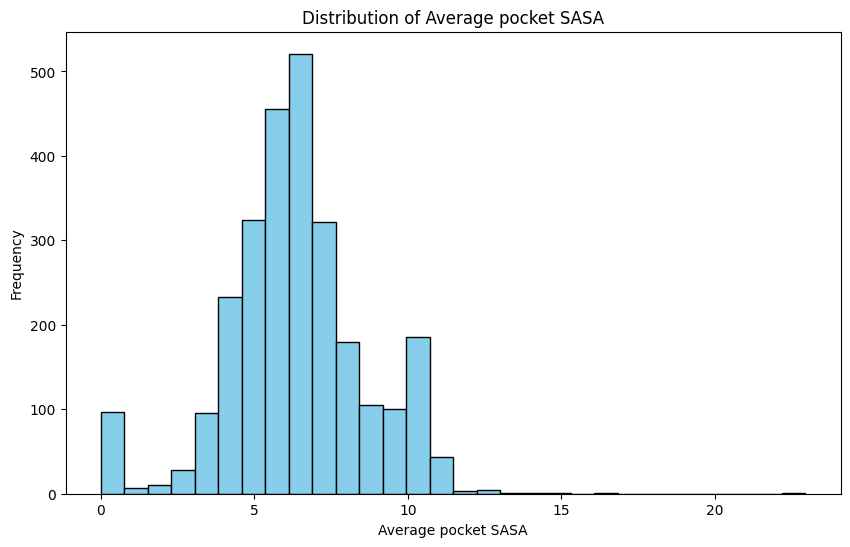

6.501756276564121


In [3]:
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(hydrophobicities, bins=30, color='skyblue', edgecolor='black')
peak_index = np.argmax(counts)
peak_x = (bins[peak_index] + bins[peak_index + 1]) / 2
plt.title('Distribution of Average pocket SASA')
plt.xlabel('Average pocket SASA')
plt.ylabel('Frequency')
plt.show()
print(peak_x)

In [4]:
from lib.pdb import get_all_pdb_names

In [7]:
hydrophobic = []
hydrophilic = []
neutral = []

for pdb_name, hydrophobicity in zip(get_all_pdb_names(), hydrophobicities):
    if hydrophobicity > 6.5017:
        hydrophobic.append(pdb_name)
    else:
        hydrophilic.append(pdb_name)

In [8]:
len(hydrophilic) ,len(hydrophobic), len(neutral)

(1545, 1174, 0)

In [10]:
with open('../../../data/pdb_group/ave_SASA_large_pdb', mode='w') as f:
    for pdb in hydrophobic:
        f.write(pdb + '\n')

In [12]:
with open('../../../data/pdb_group/ave_SASA_small_pdb', mode='w') as f:
    for pdb in hydrophilic:
        f.write(pdb + '\n')

In [93]:
with open('../../data/neutral_500_pdb', mode='w') as f:
    for pdb in neutral:
        f.write(pdb + '\n')

In [13]:
with open('../../../data/train_list', mode='r') as f:
    train_pdb_list = f.read().splitlines()
with open('../../../data/val_list', mode='r') as f:
    val_pdb_list = f.read().splitlines()
train_pdb_set = set(train_pdb_list)
val_pdb_set = set(val_pdb_list)

In [14]:
hydrophobic_set = set(hydrophobic)
hydrophilic_set = set(hydrophilic)
# neutral_set = set(neutral)

In [15]:
test_hydrophobic = list(((train_pdb_set | val_pdb_set) & hydrophobic_set))
test_hydrophilic = list(((train_pdb_set | val_pdb_set) & hydrophilic_set))
# test_neutral = list(((train_pdb_set | val_pdb_set) & neutral_set))

In [13]:
with open('../../../data/train_ave_SASA_large_pdb', mode='w') as f:
    for pdb in test_hydrophobic:
        f.write(pdb + '\n')

In [14]:
with open('../../../data/train_ave_SASA_small_pdb', mode='w') as f:
    for pdb in test_hydrophilic:
        f.write(pdb + '\n')

In [98]:
with open('../../data/test_neutral_500_pdb', mode='w') as f:
    for pdb in test_neutral:
        f.write(pdb + '\n')